In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

pd.set_option('display.float_format', '{:0.2f}'.format)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.17,0.16,0.14,nan,nan,nan,nan,NaN,nan,0,CO,Other,Self-employed,2.00,True,True,NaN,2007-08-26 18:41:46.780000000,640.00,659.00,2001-10-11 00:00:00,5.00,4.00,12.00,1,24.00,3.00,3.00,2.00,472.00,4.00,0.00,0.00,0.00,0.00,1500.00,11.00,0.81,0.00,0.17,"$25,000-49,999",True,3083.33,E33A3400205839220442E84,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.00,0.00,0.00,0.00,1.00,0,0,0.00,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12,0.09,0.08,0.08,0.02,0.05,6.00,A,7.00,2,CO,Professional,Employed,44.00,False,False,NaN,2014-02-27 08:28:14,680.00,699.00,1996-03-18 00:00:00,14.00,14.00,29.00,13,389.00,3.00,5.00,0.00,0.00,0.00,1.00,0.00,3989.00,0.21,10266.00,29.00,1.00,2.00,0.18,"$50,000-74,999",True,6125.00,9E3B37071505919926B1D82,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0,0,0.00,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28,0.28,0.24,nan,nan,nan,nan,NaN,nan,0,GA,Other,Not available,nan,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.00,499.00,2002-07-27 00:00:00,nan,nan,3.00,0,0.00,0.00,1.00,1.00,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,0.06,Not displayed,True,2083.33,6954337960046817851BCB2,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.00,0.00,0.00,0.00,1.00,0,0,0.00,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.13,0.10,0.09,0.08,0.02,0.06,6.00,A,9.00,16,GA,Skilled Labor,Employed,113.00,True,False,NaN,2012-10-22 11:02:32,800.00,819.00,1983-02-28 00:00:00,5.00,5.00,29.00,7,115.00,0.00,1.00,4.00,10056.00,14.00,0.00,0.00,1444.00,0.04,30754.00,26.00,0.76,0.00,0.15,"$25,000-49,999",True,2875.00,A0393664465886295619C51,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.00,0.00,0.00,0.00,1.00,0,0,0.00,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.25,0.21,0.20,0.18,0.09,0.0

## Factors that determine loan outcome.
Most creditors today use several factors in determining wether to issue loan.
According to [gobankingrates.com](https://www.gobankingrates.com/loans/personal/banks-decide-personal-loan-eligibility/), factors such as Credit score, Current income, Employment history, Equated monthly installment, and Repayment history are greatly scrutnized when applying for loan.

I will start off by selecting specific features that meet these factors and analyze them to see if they do in fact determine getting a loan.

# Pre-Wrangle Analysis

In [3]:
# lowercase all column names
df.columns = df.columns.str.lower()

In [4]:
# drop unneeded features
df.drop(['listingkey', 'listingnumber', 'listingcreationdate', 'creditgrade', 'closeddate', 'borrowerapr',
       'lenderyield', 'estimatedeffectiveyield', 'estimatedloss',
       'estimatedreturn', 'prosperrating (numeric)', 'prosperrating (alpha)',
       'prosperscore', 'listingcategory (numeric)', 'borrowerstate',
       'currentlyingroup', 'groupkey',
       'datecreditpulled', 'creditscorerangeupper',
       'firstrecordedcreditline', 'currentcreditlines', 'opencreditlines',
       'openrevolvingaccounts',
       'openrevolvingmonthlypayment', 'inquirieslast6months',
       'currentdelinquencies', 'amountdelinquent',
       'publicrecordslast10years', 'publicrecordslast12months',
       'revolvingcreditbalance',
       'availablebankcardcredit', 'totaltrades',
       'tradesneverdelinquent (percentage)', 'tradesopenedlast6months',
       'incomerange', 'incomeverifiable',
       'loankey', 'totalprosperloans',
       'totalprosperpaymentsbilled', 'ontimeprosperpayments',
       'prosperpaymentslessthanonemonthlate',
       'prosperpaymentsonemonthpluslate', 'prosperprincipalborrowed',
       'prosperprincipaloutstanding', 'scorexchangeattimeoflisting',
       'loancurrentdaysdelinquent', 'loanfirstdefaultedcyclenumber',
       'loanmonthssinceorigination', 'loannumber',
       'loanoriginationdate', 'loanoriginationquarter', 'memberkey',
       'monthlyloanpayment', 'lp_customerpayments',
       'lp_customerprincipalpayments', 'lp_interestandfees', 'lp_servicefees',
       'lp_collectionfees', 'lp_grossprincipalloss', 'lp_netprincipalloss',
       'lp_nonprincipalrecoverypayments', 'percentfunded', 'recommendations',
       'investmentfromfriendscount', 'investmentfromfriendsamount',
       'investors'], axis=1, inplace=True)

In [5]:
df.shape

(113937, 15)

In [6]:
df.dtypes

term                            int64
loanstatus                     object
borrowerrate                  float64
occupation                     object
employmentstatus               object
employmentstatusduration      float64
isborrowerhomeowner              bool
creditscorerangelower         float64
totalcreditlinespast7years    float64
totalinquiries                float64
delinquencieslast7years       float64
bankcardutilization           float64
debttoincomeratio             float64
statedmonthlyincome           float64
loanoriginalamount              int64
dtype: object

In [7]:
df.isnull().sum()

term                             0
loanstatus                       0
borrowerrate                     0
occupation                    3588
employmentstatus              2255
employmentstatusduration      7625
isborrowerhomeowner              0
creditscorerangelower          591
totalcreditlinespast7years     697
totalinquiries                1159
delinquencieslast7years        990
bankcardutilization           7604
debttoincomeratio             8554
statedmonthlyincome              0
loanoriginalamount               0
dtype: int64

In [8]:
# drop rows containing null values
df.dropna(axis=0, inplace=True)

In [9]:
# change term data type
term_order = [12, 36, 60]
term_ordered = pd.api.types.CategoricalDtype(categories=term_order, ordered=True)
df['term'] = df['term'].astype(term_ordered)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96559 entries, 0 to 113936
Data columns (total 15 columns):
term                          96559 non-null category
loanstatus                    96559 non-null object
borrowerrate                  96559 non-null float64
occupation                    96559 non-null object
employmentstatus              96559 non-null object
employmentstatusduration      96559 non-null float64
isborrowerhomeowner           96559 non-null bool
creditscorerangelower         96559 non-null float64
totalcreditlinespast7years    96559 non-null float64
totalinquiries                96559 non-null float64
delinquencieslast7years       96559 non-null float64
bankcardutilization           96559 non-null float64
debttoincomeratio             96559 non-null float64
statedmonthlyincome           96559 non-null float64
loanoriginalamount            96559 non-null int64
dtypes: bool(1), category(1), float64(9), int64(1), object(3)
memory usage: 10.5+ MB


### Variable Definitions
- `Term` - The length of the loan expressed in months.
- `loanstatus` - The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
- `BorrowerRate` - The Borrower's interest rate for this loan. 
- `Occupation` - The Occupation selected by the Borrower at the time they created the listing.
- `EmploymentStatus` - The employment status of the borrower at the time they posted the listing.
- `EmploymentStatusDuration` - The length in months of the employment status at the time the listing was created.
- `IsBorrowerHomeowner` - A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
- `CreditScoreRangeLower` - The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.
- `TotalCreditLinesPast7Years` - Number of credit lines in the past seven years at the time the credit profile was pulled.
- `TotalInquiries` - Total number of inquiries at the time the credit profile was pulled.
- `DelinquenciesLast7Years` - Number of delinquencies in the past 7 years at the time the credit profile was pulled.
- `BankCardUtilization` - The percentage of available revolving credit that is utilized at the time the credit profile was pulled.
- `DebtToIncomeRatio` - The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
- `StatedMonthlyIncome` - The monthly income the borrower stated at the time the listing was created.
- `LoanOriginalAmount` - The origination amount of the loan.

In [11]:
df.head()

,term,loanstatus,borrowerrate,occupation,employmentstatus,employmentstatusduration,isborrowerhomeowner,creditscorerangelower,totalcreditlinespast7years,totalinquiries,delinquencieslast7years,bankcardutilization,debttoincomeratio,statedmonthlyincome,loanoriginalamount
0,36,Completed,0.16,Other,Self-employed,2.00,True,640.00,12.00,3.00,4.00,0.00,0.17,3083.33,9425
1,36,Current,0.09,Professional,Employed,44.00,False,680.00,29.00,5.00,0.00,0.21,0.18,6125.00,10000
3,36,Current,0.10,Skilled Labor,Employed,113.00,True,800.00,29.00,1.00,14.00,0.04,0.15,2875.00,10000
4,36,Current,0.21,Executive,Employed,44.00,True,680.00,49.00,9.00,0.00,0.81,0.26,9583.33,15000
5,60,Current,0.13,Professional,Employed,82.00,True,740.00,49.00,2.00,0.00,0.39,0.36,8333.33,15000


In [12]:
df.describe()

,borrowerrate,employmentstatusduration,creditscorerangelower,totalcreditlinespast7years,totalinquiries,delinquencieslast7years,bankcardutilization,debttoincomeratio,statedmonthlyincome,loanoriginalamount
count,96559.00,96559.00,96559.00,96559.00,96559.00,96559.00,96559.00,96559.00,96559.00,96559.00
mean,0.19,97.08,690.47,27.28,5.36,4.02,0.57,0.28,5744.27,8707.45
std,0.07,93.45,56.97,13.61,5.79,9.91,0.32,0.53,4927.71,6372.53
min,0.00,0.00,520.00,2.00,0.00,0.00,0.00,0.00,0.00,1000.00
25%,0.13,27.00,660.00,17.00,2.00,0.00,0.31,0.15,3333.33,4000.00
50%,0.18,69.00,680.00,26.00,4.00,0.00,0.61,0.22,4875.00,7000.00
75%,0.25,139.00,720.00,35.00,7.00,3.00,0.84,0.32,7000.00,12500.00
max,0.36,755.00,880.00,136.00,158.00,99.00,5.95,10.01,483333.33,35000.00


#### Key Takeaways
- couple borrower rates at zero, maybe an offered loan with zero rates for certain amount
- huge outlier on employment duration, amazing and possible to have 62 years of employment
- zero credit scores, maybe for those with none to start with
- big outlier in total credit lines
- huge outlier in total inquiries
- huge outlier in deliquencies
- huge outlier in bank card utilization
- outliers as well in debt to income, monthly income and loan original amount

 Some outliers seem impractical but possible still, so i'll work with them

# Exploratory Analysis
## Univariate Exploration

##### Question 1.
- How do the loans distribute in each term?

In [13]:
# extract seaborn base color for same color graphs
base_color = sb.color_palette()[0]

In [14]:
# extract term counts
n_df = df.shape[0]
term_counts = df['term'].value_counts()
max_term_count = term_counts[1]
max_term_prop = max_term_count / n_df
print(max_term_prop)

0.7483611056452532


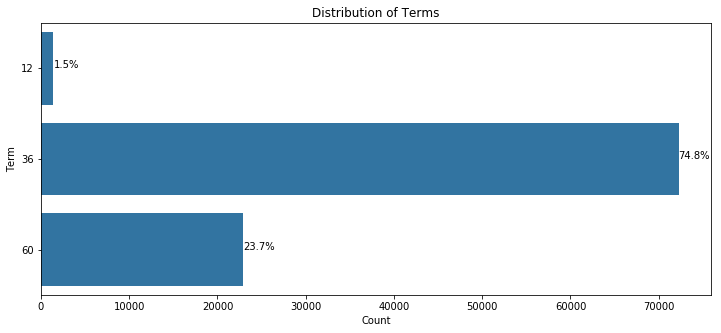

In [15]:
plt.figure(figsize=(12,5))
sb.countplot(data=df, y='term', color=base_color)
plt.title('Distribution of Terms')
plt.ylabel('Term')
plt.xlabel('Count')

for i in range(term_counts.shape[0]):
    count = term_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_df)
    plt.text(count+1, i, pct_string)

##### Conclusion
- Most (75%) of loans were 36 terms followed by 60 terms at 24% and a minuscule (1.5%) amount at 12 terms.

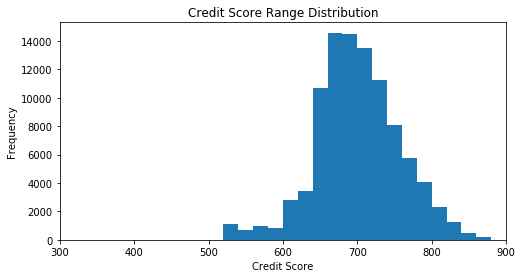

In [16]:
plt.figure(figsize=(8, 4))
bins = np.arange(0, df['creditscorerangelower'].max()+20, 20)
plt.hist(data=df, x='creditscorerangelower', bins=bins);
plt.xlim((300, 900))
plt.title('Credit Score Range Distribution')
plt.ylabel('Frequency')
plt.xlabel('Credit Score');

##### Conclusion
- Majority of the borrowers credit score range falls between 650 and 750 with very small amount falling between 450 and 600.

##### Question 3.
- How do the original loan amounts distribute?

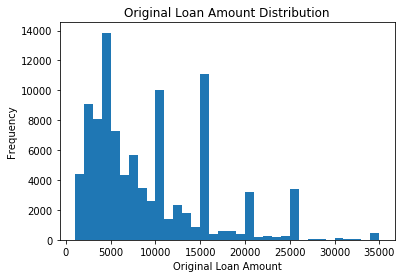

In [17]:
bins = np.arange(1000, df['loanoriginalamount'].max()+20, 1000)
plt.hist(data=df, x='loanoriginalamount', bins=bins)
plt.title('Original Loan Amount Distribution')
plt.ylabel('Frequency')
plt.xlabel('Original Loan Amount');

##### Conclusion
- Majority of original loan falls around 5000, whith some upticks around 10000, 15000, 20000, and 25000

## Bivariate Exploration

##### Question 1.
- What is the distribution of original loan amounts for each term?

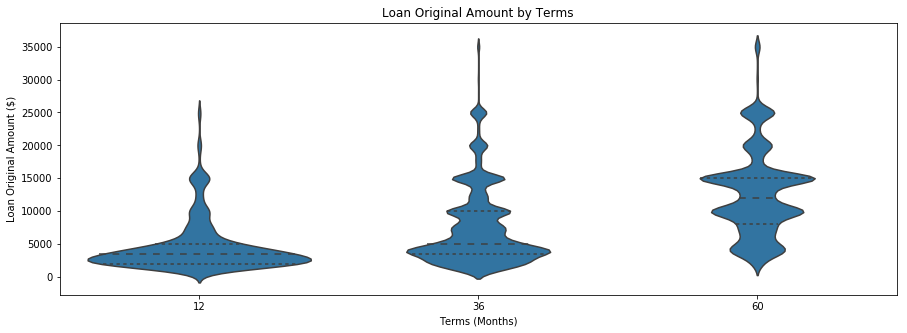

In [18]:
plt.figure(figsize=(15,5))
sb.violinplot(data=df, x='term', y='loanoriginalamount', inner='quartile', color=base_color);
plt.title('Loan Original Amount by Terms')
plt.xlabel('Terms (Months)')
plt.ylabel('Loan Original Amount ($)');

##### Conclusion
- Unsurprisingly, the more the original amount is, the longer the duration.

##### Question 2.
- What is the distribution of borrower rate by the term of the loan?

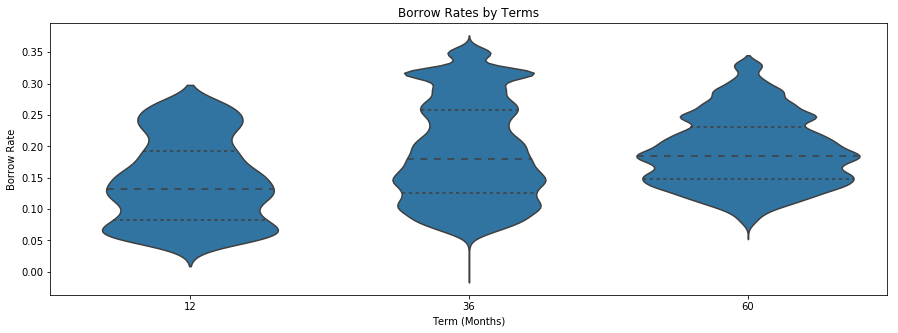

In [19]:
plt.figure(figsize=(15,5))
sb.violinplot(data=df, x='term', y='borrowerrate', inner='quartile', color=base_color);
plt.title('Borrow Rates by Terms')
plt.xlabel('Term (Months)')
plt.ylabel('Borrow Rate');

##### Conclusion
- It seems the longer the term, the higher the interest rate.

##### Question 3.
- Do certain employment status have more original loan approved? Do the rates vary?

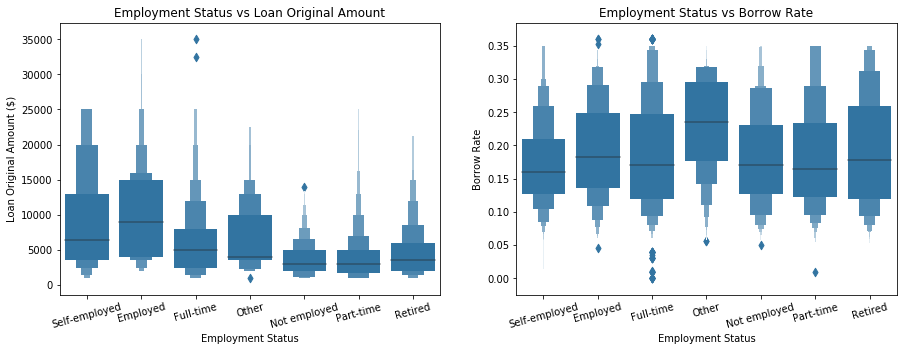

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sb.boxenplot(data=df, x='employmentstatus', y='loanoriginalamount', color=base_color)
plt.xticks(rotation=15)
plt.title('Employment Status vs Loan Original Amount')
plt.xlabel('Employment Status')
plt.ylabel('Loan Original Amount ($)');

plt.subplot(1, 2, 2)
sb.boxenplot(data=df, x='employmentstatus', y='borrowerrate', color=base_color)
plt.xticks(rotation=15);
plt.title('Employment Status vs Borrow Rate')
plt.xlabel('Employment Status')
plt.ylabel('Borrow Rate');

##### Conclusion
- Those who are employed received lager amount of original loans while those who are self employed received lower rates.

##### Question 4.
- What is the distribution of credit scores by employment status?
**careful! the histograms do not share y axis as some have significantly lower than others**

<Figure size 432x720 with 0 Axes>

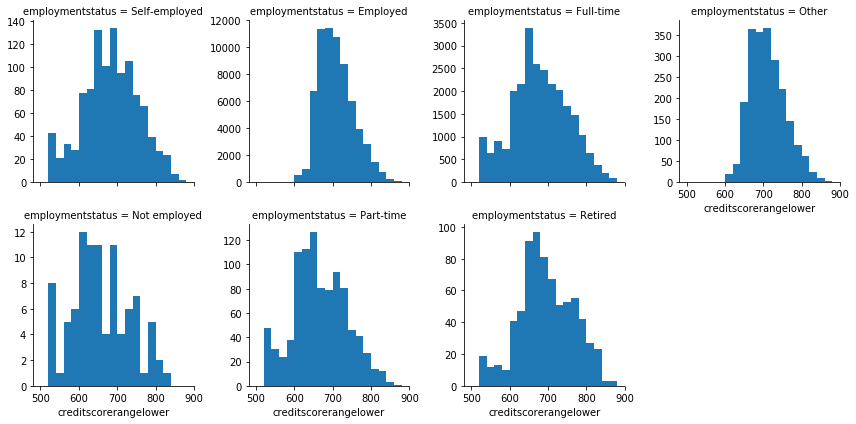

In [21]:
plt.figure(figsize=(6,10))
bins = np.arange(500, 880+20, 20)
g = sb.FacetGrid(data=df, col='employmentstatus', col_wrap=4, sharey=False)
g.map(plt.hist, 'creditscorerangelower', bins=bins);

##### Conclusion
- Only those employed and other had scores starting from 600, the retired and self employed for example have scores much lower than 600 suggesting they offered collateral more likely.

##### Question 5.
- Is there a correlation between credit score and borrower rate?

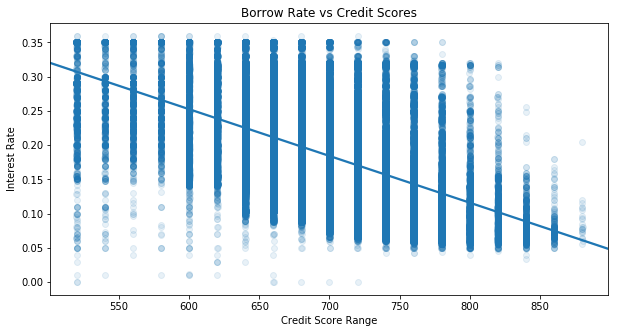

In [22]:
plt.figure(figsize=(10, 5))
sb.regplot(data=df, x='creditscorerangelower', y='borrowerrate',
          x_jitter=0.3, scatter_kws={'alpha': 1/10});
plt.title('Borrow Rate vs Credit Scores')
plt.xlabel('Credit Score Range')
plt.ylabel('Interest Rate');

##### Conclusion
- Yes, the higher the credit score the lower the borrower rate.

##### Question 6.
- Is there a correlation between debt-to-income ratio and borrower rate?

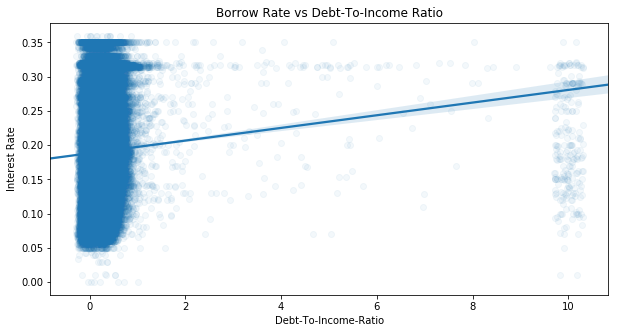

In [23]:
plt.figure(figsize=(10,5))
sb.regplot(data=df, x='debttoincomeratio', y='borrowerrate',
          x_jitter=0.3, scatter_kws={'alpha': 1/20});
plt.title('Borrow Rate vs Debt-To-Income Ratio')
plt.xlabel('Debt-To-Income-Ratio')
plt.ylabel('Interest Rate');

##### Conclusion
- A little hard to see, but as debt-to-income ratio increases. So does borrower rate.

##### Question 7
- Is there a correlation between borrow rates and total inquiries?

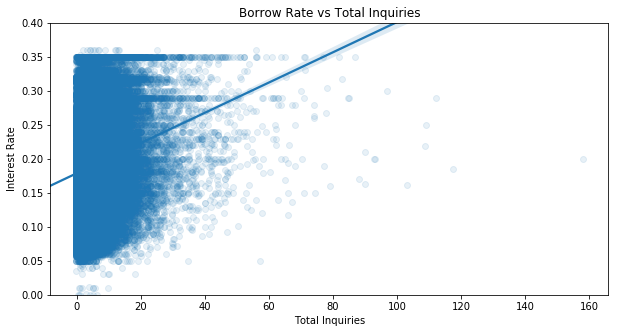

In [24]:
plt.figure(figsize=(10, 5))
sb.regplot(data=df, x='totalinquiries', y='borrowerrate', 
           x_jitter=0.3, scatter_kws={'alpha': 1/10});
plt.title('Borrow Rate vs Total Inquiries')
plt.ylim((0,0.4))
plt.xlabel('Total Inquiries')
plt.ylabel('Interest Rate');

##### Conclusion
- The higher the total inquiries the higher the borrow rate.

##### Question 8
- Is there correlation between employment duration and borrow rate?

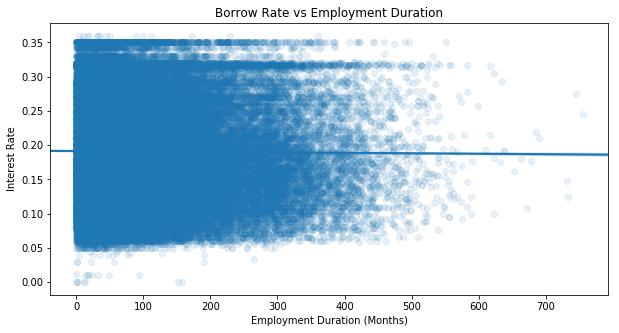

In [25]:
plt.figure(figsize=(10, 5))
sb.regplot(data=df, x='employmentstatusduration', y='borrowerrate', 
           x_jitter=0.3, scatter_kws={'alpha': 1/10})
plt.title('Borrow Rate vs Employment Duration')
plt.xlabel('Employment Duration (Months)')
plt.ylabel('Interest Rate');

##### Conclusion
- Employment duration has little to no effect of borrow rates

##### Question 9
- Is there correlation between number of deliquencies and borrow rates?

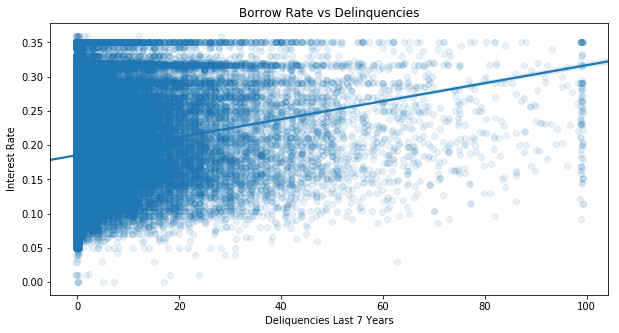

In [26]:
plt.figure(figsize=(10, 5))
sb.regplot(data=df, x='delinquencieslast7years', y='borrowerrate', 
           x_jitter=0.3, scatter_kws={'alpha': 1/10});
plt.title('Borrow Rate vs Delinquencies')
plt.xlabel('Deliquencies Last 7 Years')
plt.ylabel('Interest Rate');

##### Conclusion
- Yes, having more deliquencies means higher rates.

## Multi-Variate Exploration

##### Question 1.
- Does being a home owner have any effect on credit score and borrow rate?

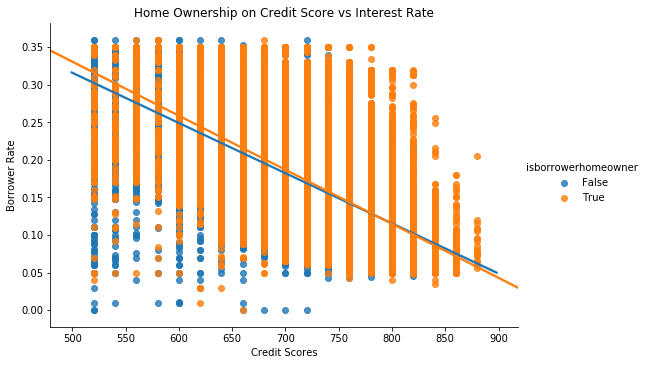

In [27]:
sb.lmplot(data=df, x='creditscorerangelower', y='borrowerrate', hue='isborrowerhomeowner', aspect=1.5);
plt.title('Home Ownership on Credit Score vs Interest Rate')
plt.xlabel('Credit Scores')
plt.ylabel('Borrower Rate');

#### Conclusion
- There's very little effect homeownership has on credit scores v interest rate

##### Question 2.
- Do terms have an effect on credit scores vs interest rate?

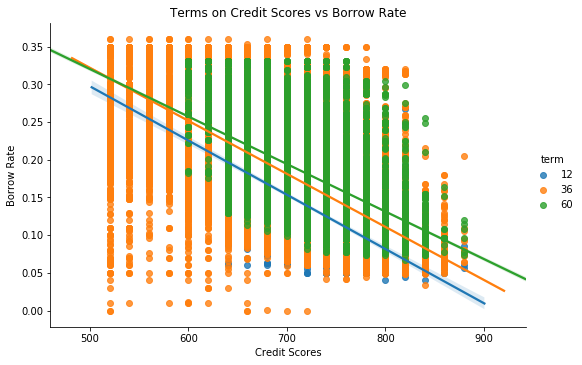

In [28]:
sb.lmplot(data=df, x='creditscorerangelower', y='borrowerrate', hue='term', aspect=1.5)
plt.title('Terms on Credit Scores vs Borrow Rate')
plt.xlabel('Credit Scores')
plt.ylabel('Borrow Rate');

##### Conclusion
- Slightly, the longer the term the higher the interest rate for same credit scores.

##### Question 3.
- Does having some sort of employment effect credit scores vs interest rate?

In [29]:
df['employment_status_cat'] = np.where(df['employmentstatus'].isin(['Self-employed',
                                'Employed','Full-time', 'Part-time']), 
         "Employed", "Not-Employed/Other")

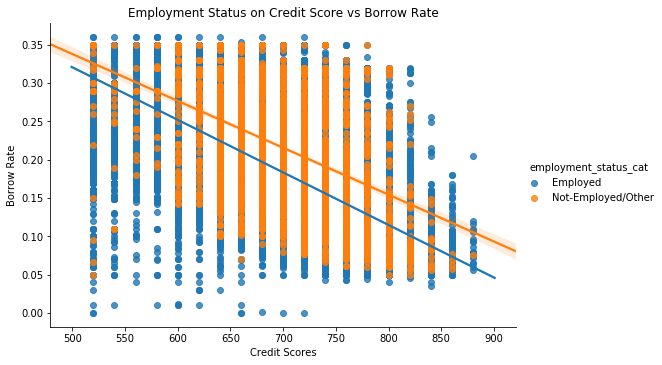

In [30]:
sb.lmplot(data=df, x='creditscorerangelower', y='borrowerrate', hue='employment_status_cat', aspect=1.5)
plt.title('Employment Status on Credit Score vs Borrow Rate')
plt.xlabel('Credit Scores')
plt.ylabel('Borrow Rate');

##### Conclusion
- Overall, even though there's alot more people who are employed with low scores and high borrow rates. Being employed does seem to have lower borrow rates for same amount of credit scores.

## Conclusion
When it came to loans, things like credit score, debt to income ratio, deliquencies all had major effect on the borrow rates.
Just like in real world, the worse off all those attributes are the higher the rates on the loans.
Also, I've decided to not use multi-variate analysis as it's not convinient for this data. There's simply too much data and even mapping didn't help.